# C√°lculo Num√©rico - 2021.2 - Tarefa 5 - Professor Jo√£o Paix√£o
## Realizado por: David Rodrigues Albuquerque - 120047390
## Quest√µes discutidas com: Beatriz Almeida Ramos, Carlos Bravo, Matheus Barroso

# Exerc√≠cio 1

Para este exerc√≠cio, devemos determinar uma curva na forma $T = c_{0}x^{c_{1}}$ o qual melhor se ajusta nos dados fornecidos utilizando o m√©todo de m√≠nimos quadrados com coeficientes n√£o-lineares. Em seguida, devemos utilizar o modelo estipulado para calcular T(0.3) com 3 casas decimais.

No primeiro passo, podemos importar de nossa biblioteca as fun√ß√µes vandermonde e regress√£o para calcular o sistema correspendente utilizando m√≠nimos quadrados com coeficientes n√£o-lineares. Para isto, utilizaremos as entradas $x$ e $y$ na forma $\overline{x} = ln(x)$ e $\overline{y} = ln(y)$ para fazer a transformada do caso n√£o-linear para linear.

In [607]:
using Plots
using LinearAlgebra

In [608]:
function vandermonde(x,y,grau)
    n,=size(y)
    V=zeros(n,grau+1)
    for i=1:n #linhas
        for j=1:(grau+1)
            V[i,j]=x[i]^(j-1)
        end
    end
    return V
end

vandermonde (generic function with 1 method)

In [609]:
function regressao(x,y,grau)
    V=vandermonde(x,y,grau)
    c=V\y #m√≠nimos quadrados
    return c, grau
end

regressao (generic function with 1 method)

In [610]:
function aproxima_funcao(x,y)
    x_barra = log.(x) # ln(x)
    y_barra = log.(y) # ln(y)
    coefs = regressao(x_barra,y_barra,1)
    return coefs
end

aproxima_funcao (generic function with 1 method)

Com isto, podemos utilizar a fun√ß√£o aproxima fun√ß√£o para determinar os coeficientes da aproxima√ß√£o da fun√ß√£o que desejamos, atentando-se ao fato de retorn√°-los de volta ao n√£o-linear utilizando a inversa da fun√ß√£o logaritmo natural. Como calculamos os valores de $x$ na forma $\overline{x}$, s√≥ precisaremos aplicar a inversa em $x$, 

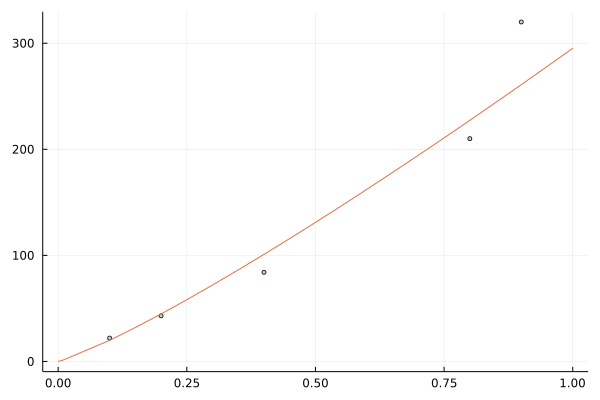

In [611]:
x = [0.1,0.2,0.4,0.8,0.9]
y = [22,43,84,210,320]

coefs, _ = aproxima_funcao(x,y)
c0 = exp(coefs[1])
c1 = coefs[2]
f(x) = (c0)*(x^(c1))
scatter(x, y, c=:lightblue, ms=3, leg=false)
plot!(f,0,1)

Com isto, podemos calcular $T(0.3)$.

In [612]:
round(f(0.3), digits=3)

72.061

# Exerc√≠cio 2.a)

Neste exerc√≠cio, devemos utilizar os pontos descritos para encontrar uma fun√ß√£o $f(x)$ que satisfa√ßa os pontos dados e estimar a dist√¢ncia percorrida pela √¥nibus em $t=125$. Isto √©, encontrada a fun√ß√£o, devemos calcular $ \int_{0}^{125} (f(x) + E_{\epsilon}(x)) \,dx$ pois, integrando o gr√°fico velocidade, teremos a dist√¢ncia percorrida.

Dados os pontos utlizados, podemos importar de nossa biblioteca a fun√ß√£o de interpola√ß√£o polinomial para encontrar a fun√ß√£o descrita em cada um dos intervalos.

In [613]:
function interpolacao_onibus(x,y,grau)
    # Cria a matriz V
    V = vandermonde(x,y,grau)
    c=V\y # Resolve o sistema linear Vc=y
    return c #vetor de coeficientes
end

interpolacao_onibus (generic function with 1 method)

In [614]:
function trapezio(f,a,b,n) #calcular a integral f(x) de a at√© b 
    h=(b-a)/n
    S=0.0
    for i=1:(n-1)  #calcula o "meio"
        x=a+i*h
        S+=2*f(x)
    end
    S=h/2*(S+f(a)+f(b)) #calcula "as pontas"
    return S
end

trapezio (generic function with 1 method)

Com isto, podemos utilizar o m√©todo do trap√©zio em cada intervalo $(x_{n},x_{n+1}$) para os valores descritos. Ap√≥s, basta somar as √°reas encontradas.

In [615]:
using Polynomials

In [616]:
altura = 0.0
x = [0,10,15,20,32,59,62,125]
y = [0,185,319,447,742,1325,1445,4151]
xn = [0,10]
yn = [0,185]
coefs = interpolacao_onibus(xn,yn,1)
p = Polynomial(coefs)
altura += trapezio(p,xn[1],xn[2],1000)
xn = [10,15]
yn = [185,319]
coefs = interpolacao_onibus(xn,yn,1)
p = Polynomial(coefs)
altura += trapezio(p,xn[1],xn[2],1000)
xn = [15,20]
yn = [319,447]
coefs = interpolacao_onibus(xn,yn,1)
p = Polynomial(coefs)
altura += trapezio(p,xn[1],xn[2],1000)
xn = [20,32]
yn = [447,742]
coefs = interpolacao_onibus(xn,yn,1)
p = Polynomial(coefs)
altura += trapezio(p,xn[1],xn[2],1000)
xn = [32,59]
yn = [742,1325]
coefs = interpolacao_onibus(xn,yn,1)
p = Polynomial(coefs)
altura += trapezio(p,xn[1],xn[2],1000)
xn = [59,62]
yn = [1325,1445]
coefs = interpolacao_onibus(xn,yn,1)
p = Polynomial(coefs)
altura += trapezio(p,xn[1],xn[2],1000)
xn = [62,125]
yn = [1445,4151]
coefs = interpolacao_onibus(xn,yn,1)
p = Polynomial(coefs)
altura += trapezio(p,xn[1],xn[2],1000)
round(altura, digits=3)

219567.5

Com isso, temos que o √¥nibus espacial endeavour, no momento $t = 125$ estava na altura de aproximadamente $219567.5$ p√©s, equivalente a aproximadamente $66,924174$ km.

# Exerc√≠cio 2.b)

Para estipularmos o erro m√°ximo cometido, precisar√≠amos ter como informa√ß√£o um $M$ tal que $f''(x) \leq M$ para todo $a \leq x \leq b$. Como n√£o temos esta informa√ß√£o, √© computacionalmente custoso calcular o erro m√°ximo nas condi√ß√µes dadas.

# Exerc√≠cio 2.c)

Para encontrarmos uma reta $p_{1} = c_{0}x+c_{1}$ que melhor descreve a distribui√ß√£o dos pontos, podemos utilizar de nossa biblioteca o m√©todo da regress√£o. Depois disso, podemos utilizar o m√©todo do trap√©zio para calcular $ \int_{0}^{125} p_{1}(x) \,dx$. Vamos utilizar ent√£o a fun√ß√£o aproxima_onibus em conjunto com a regress√£o.

In [617]:
function aproxima_onibus(x,y)
    coefs = regressao(x,y,1)
    return coefs
end

aproxima_onibus (generic function with 1 method)

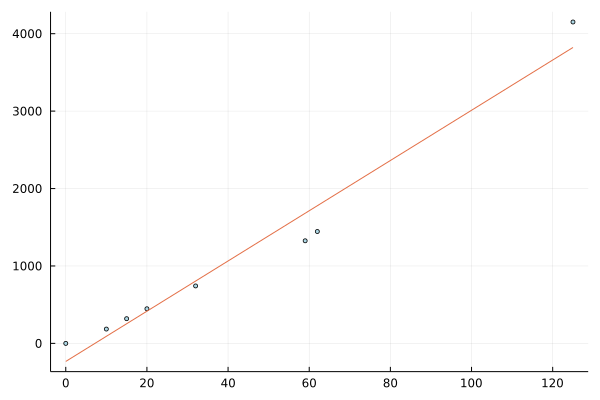

In [618]:
x = [0,10,15,20,32,59,62,125]
y = [0,185,319,447,742,1325,1445,4151]

coefs, _ = aproxima_onibus(x,y)
p = Polynomial(coefs)
scatter(x, y, c=:lightblue, ms=3, leg=false)
plot!(p,0,125)

Com isto, como j√° temos uma reta, podemos utilizar o m√©todo do trap√©zio de $0$ at√© $125$ diretamente e estimarmos a altura.

In [619]:
altura = 0.0
x = [0,10,15,20,32,59,62,125]
y = [0,185,319,447,742,1325,1445,4151]
xn = [0,125]
coefs,_ = aproxima_onibus(x,y)
p = Polynomial(coefs)
altura += trapezio(p,xn[1],xn[2],1)
round(altura, digits=3)

224307.609

Com isso, temos que o √¥nibus espacial endeavour, no momento  $ùë° = 125$, de acordo com a aproxima√ß√£o pela reta, estava na altura de aproximadamente $224307,609$ p√©s, equivalente a aproximadamente $68,368$ km

# Exerc√≠cio 3.a)

Para este exerc√≠cio, precisamos determinar uma aproxima√ß√£o para a √°rea limitada ao primeiro quadrante da equa√ß√£o $x^2 + y^2 = 1$. Como utilizaremos o m√©todo do trap√©zio e estamos interessados apenas no primeiro quadrante, para simplificar as contas, utilizaremos a equa√ß√£o equivalente ao semi-c√≠rculo formado pelos 1¬∫ e 2¬∫ quadrantes, isto √©, $y = \sqrt{1 - x^2}$. Ap√≥s finalizar estes c√°lculos, com a aproxima√ß√£o obtida, devemos fazer uma aproxima√ß√£o de $\pi$ utilizando o valor encontrado.

Para isto, adaptaremos o m√©todo do trap√©zio, utilizando a fun√ß√£o trapezio_circulo, para fazer a aproxima√ß√£o utilizando a altura $h = 0.1$. Neste caso, como j√° temos a altura $h$, n√£o precisaremos utilizar a interpola√ß√£o para calcular os trap√©zios.

In [620]:
function trapezio_circulo(f,a,b) #calcular a integral f(x) de a at√© b
    n = 10 # Como h=0.1, n = 10
    h = 0.1
    S=0.0
    for i=1:(n)  #calcula o "meio"
        x=a+i*h
        S+=2*f(x)
    end
    S=h/2*(S+f(a)+f(b)) #calcula "as pontas"
    return S
end

trapezio_circulo (generic function with 1 method)

Utilizando ent√£o os limites de integra√ß√£o $a=0$ e $b=1$, podemos estimar a √°rea do primeiro quadrante.

In [621]:
x = [0,1]
y = [1,0]
f(x) = sqrt(1-x^2)
area = trapezio_circulo(f,x[1],x[2])

0.7761295815620796

Como a parte da fun√ß√£o do primeiro quadrante √© referente a $\dfrac{\pi}{4}$, podemos multiplicar a √°rea encontrada para dar uma estimativa de $\pi$.

In [622]:
area * 4

3.1045183262483182

# Exerc√≠cio 3.b)

Para calcular o erro da aproxima√ß√£o, precisamos encontrar um $M$ tal que $f''(x) <= M $ para todo $a \leq x \leq b$.
Como $f(x) = \sqrt{1-x¬≤}$, temos que $f''(x) = -\dfrac{1}{(1-x¬≤)(\sqrt{1-x¬≤})}$.

Neste caso, precisamos englobar todos os valores de $a$ at√© $b$ no c√°lculo. Entretanto, na extremidade $x=1$, podemos encontrar uma indefini√ß√£o.

$$f''(1) = -\dfrac{1}{(1-1¬≤)(\sqrt{1-1¬≤})} = -\dfrac{1}{0}$$

Com isto, j√° n√£o podemos determinar o erro estimado para o caso dado, pois $f''(1)$ est√° indeterminado.


# Exerc√≠cio 4)

Para calcularmos uma integral na forma $ \int_{a}^{b} \int_{h(y)}^{g(y)} f(x,y) dxdy$, podemos modificar o m√©todo Integral_Dupla para receber como par√¢metro os limites de integra√ß√£o como fun√ß√£o. Para isto, vamos criar uma nova fun√ß√£o, Integral_Dupla_Funcao.

In [623]:
function Integral(f,a,b)
    return trapezio(f,a,b,10000)
end

Integral (generic function with 1 method)

In [624]:
# Integral dupla de h(x,y) de a at√© b no x e de c(y) at√© d(y) no y
function Integral_Dupla_Funcao(h,a,b,c,d)
    function g(y)
        f(x)=h(x,y)
        return Integral(f,a(y),b(y)) # Neste caso, utilizamos os limites de integra√ß√£o em fun√ß√£o  de y
    end
    return Integral(g,c,d)
end

Integral_Dupla_Funcao (generic function with 1 method)

Como prova real, podemos utilizar o c√°lculo da fun√ß√£o $ \int_{6}^{5} \int_{3y}^{2y} f(x,y) dxdy$.

In [625]:
h(x,y)=x^2*y
a(y) = 2y
b(y) = 3y
Integral_Dupla_Funcao(h,a,b,5,6)

5891.266670138121

Com isto, temos que Integral_Dupla_Funcao √© capaz de calcular a integral dupla de uma fun√ß√£o na forma descrita. Podemos comparar ent√£o o resultado com alguma calculadora de integrais, como a fornecida pelo Symbolab.

![title](./symbolab.png)